# SPAM SMS DETECTION

The project aims to develop a predictive model for detecting spam SMS messages by analyzing a dataset of historical SMS data and leveraging machine learning algorithms. The goal is to identify and predict spam messages within incoming SMS traffic, thereby enhancing user experience and security.

### Dataset Description

The dataset used in this project is designed for the purpose of spam SMS message detection. It consists of a collection of SMS messages, each labeled as either "spam" or "ham".

**Dataset Features:**

* SMS Text: The actual content of the text message.

* Label (Target Variable): A binary classification label, indicating whether the SMS is "spam" or "ham."

# E.D.A.

## Overview Stage

* Read the csv
* Look for basic information about the dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Dataset/spam.csv', encoding = "latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning 

In [5]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Rename the two columns
df.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [8]:
class_le = LabelEncoder()
df['target'] = class_le.fit_transform(df['target'].values)

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
class_le.classes_

array(['ham', 'spam'], dtype=object)

### Checking missing values

In [11]:
import numpy as np

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

* We have to deal with all possible version of (-1)

In [13]:
df.replace('-1', np.nan, inplace = True)

In [14]:
df.replace(-1, np.nan, inplace = True)

In [15]:
df.replace(-1.0, np.nan, inplace = True)

In [16]:
df.isnull().sum()

target    0
text      0
dtype: int64

* No missing values found in the dataset

### Checking for duplicate values

In [17]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

Duplicate rows found:
      target                                               text
102        0  As per your request 'Melle Melle (Oru Minnamin...
153        0  As per your request 'Melle Melle (Oru Minnamin...
206        0  As I entered my cabin my PA said, '' Happy B'd...
222        0                             Sorry, I'll call later
325        0                   No calls..messages..missed calls
...      ...                                                ...
5524       1  You are awarded a SiPix Digital Camera! call 0...
5535       0  I know you are thinkin malaria. But relax, chi...
5539       0                         Just sleeping..and surfing
5553       0                        Hahaha..use your brain dear
5558       0                             Sorry, I'll call later

[403 rows x 2 columns]


In [18]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## Data Exploration and Descriptive Statistics

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

import nltk

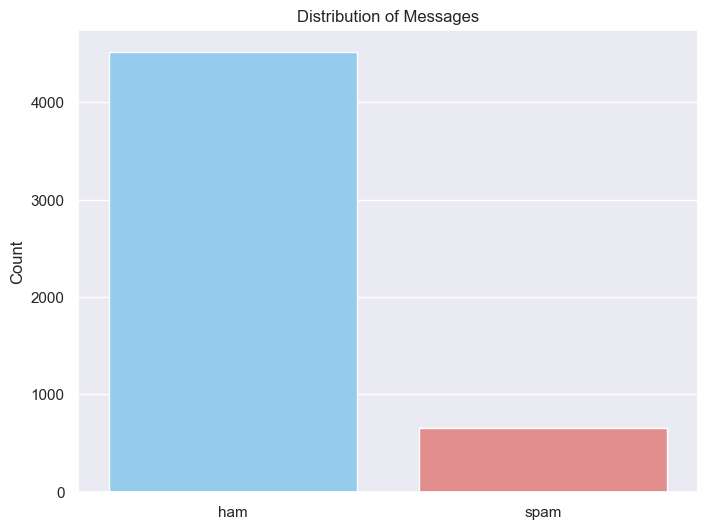

In [22]:
sns.set(style="darkgrid")

data = df['target'].value_counts()
labels = ["ham", "spam"]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=data, palette=["lightskyblue", "lightcoral"])
plt.title("Distribution of Messages")
plt.ylabel("Count")
plt.show()


* We have an imbalanced class distribution.

In [23]:
# Calculate number of characters, words, and sentences
df['number of characters'] = df['text'].apply(len)

df['number of words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

df['number of sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,number of characters,number of words,number of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.columns

Index(['target', 'text', 'number of characters', 'number of words',
       'number of sentences'],
      dtype='object')

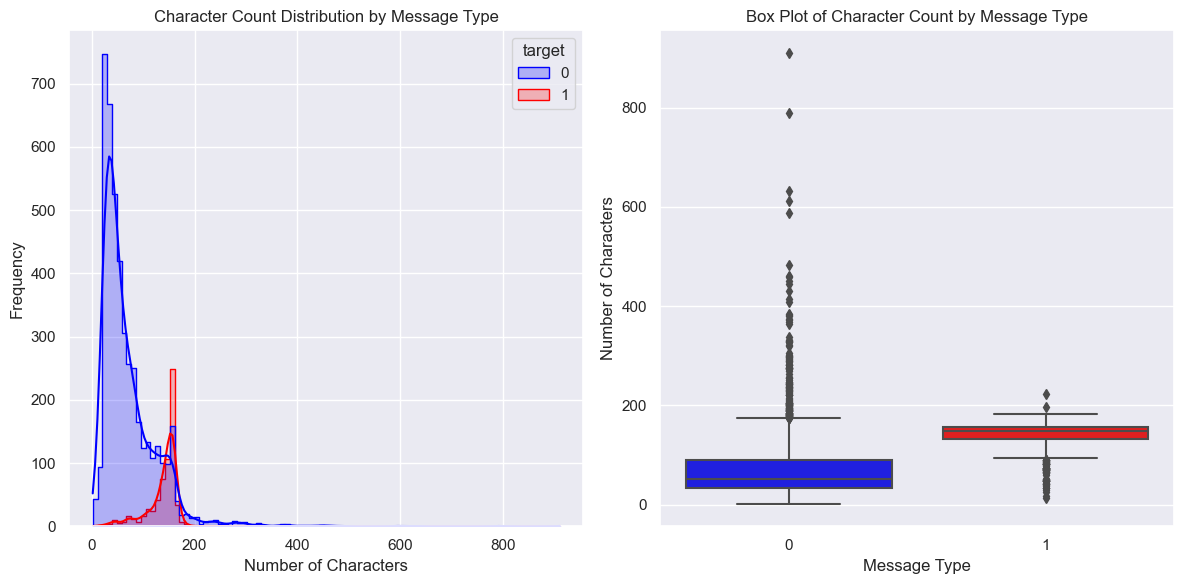

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Create the histogram
sns.histplot(data=df, x='number of characters', hue='target', common_norm=False, element='step', kde=True, palette=['blue', 'red'])
plt.title("Character Count Distribution by Message Type")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)

# Create the box plot
sns.boxplot(data=df, x='target', y='number of characters', palette=['blue', 'red'])
plt.title("Box Plot of Character Count by Message Type")
plt.xlabel("Message Type")
plt.ylabel("Number of Characters")

plt.tight_layout()
plt.show()

* For target 0, the distribution is right-skewed.
* For target 1, the distribution is left-skewed.

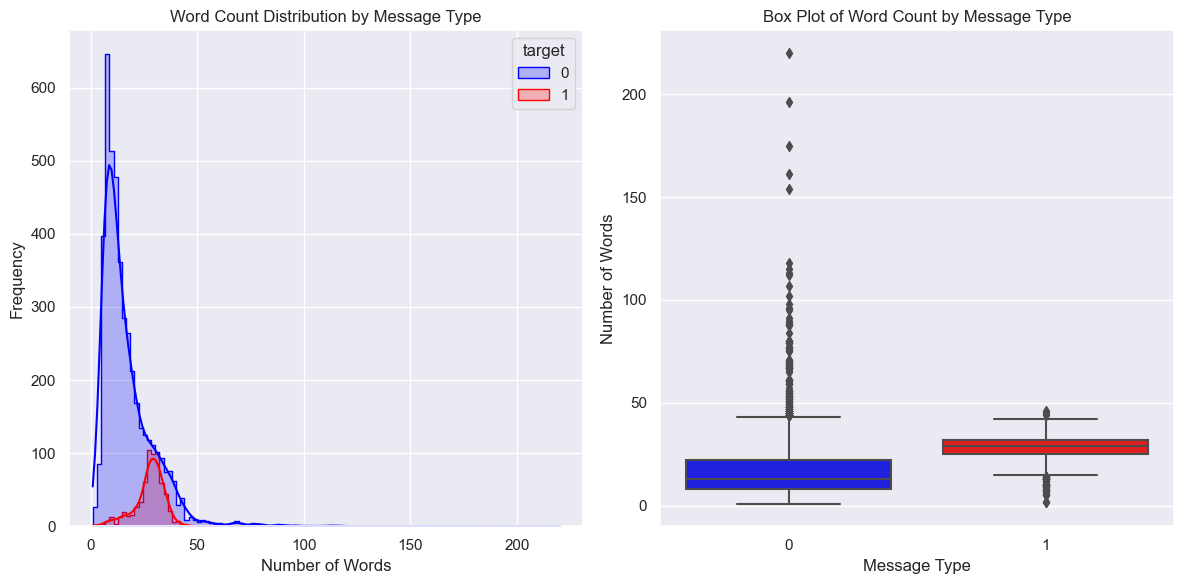

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Create the histogram
sns.histplot(data=df, x='number of words', hue='target', common_norm=False, element='step', kde=True, palette=['blue', 'red'])
plt.title("Word Count Distribution by Message Type")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)

# Create the box plot
sns.boxplot(data=df, x='target', y='number of words', palette=['blue', 'red'])
plt.title("Box Plot of Word Count by Message Type")
plt.xlabel("Message Type")
plt.ylabel("Number of Words")

plt.tight_layout()
plt.show()

* For target 0, the distribution is right-skewed.
* For target 1, the distribution is left-skewed.

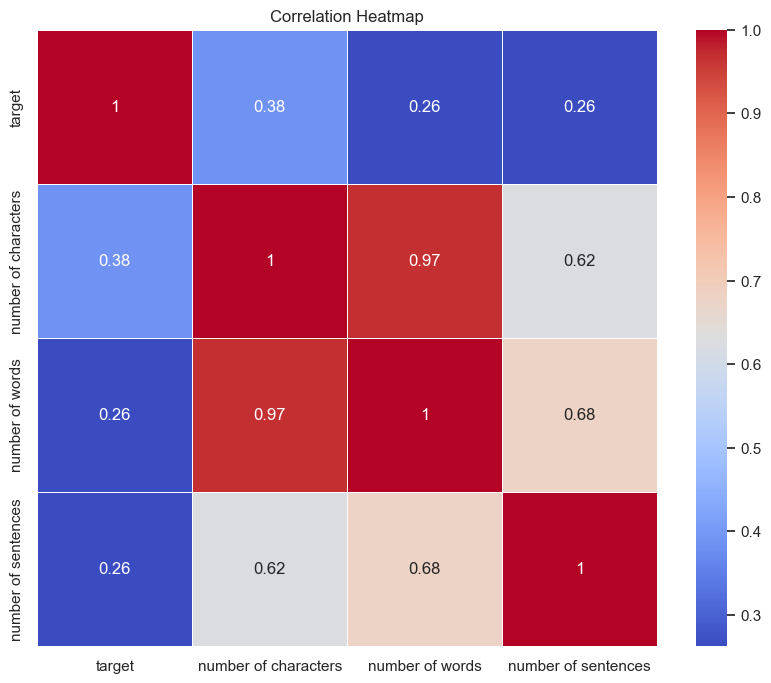

In [28]:
plt.figure(figsize=(10, 8))

correlation_matrix = df.drop(["text"], axis = 1).corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

**The correlation matrix shows that:**

1. The "number of characters" has a moderate positive correlation with the "target," indicating longer messages are more likely to be labeled as "spam."
2. Both "number of words" and "number of sentences" also have positive correlations with the "target."
3. The "number of characters" strongly correlates with the "number of words" and moderately with the "number of sentences."
4. The "number of words" and "number of sentences" exhibit a moderate positive correlation.

## Data Preprocessing

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [30]:
# Initialize the NLTK stemmer and stopwords
ps = PorterStemmer()
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def transform_text(text):
    # Convert to lowercase and tokenize
    words = nltk.word_tokenize(text.lower())
    
    # Remove non-alphanumeric characters and stopwords
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words and word not in string.punctuation]
    
    # Apply stemming
    stemmed_words = [ps.stem(word) for word in filtered_words]
    
    # Join the cleaned words into a string
    cleaned_text = " ".join(stemmed_words)
    
    return cleaned_text

[nltk_data] Downloading package stopwords to C:\Users\EL AIDI
[nltk_data]     MOHAMED\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df['transformed text'] = df['text'].apply(transform_text)
df.head()

,target,text,number of characters,number of words,number of sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Text Data WordCloud

In [32]:
from wordcloud import WordCloud

### Ham Text WordCloud

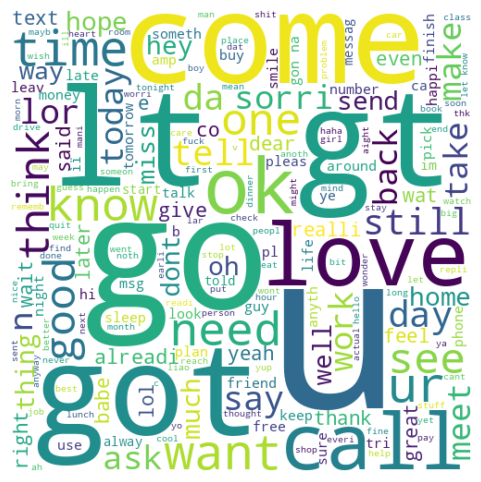

In [33]:
wc = WordCloud(width = 500, height = 500, 
               min_font_size = 10, background_color = "white")

ham_text = " ".join(df[df['target'] == 0]['transformed text'])
ham_wc = wc.generate(ham_text)

plt.figure(figsize = (15, 6))
plt.imshow(ham_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Spam Text Wordcloud

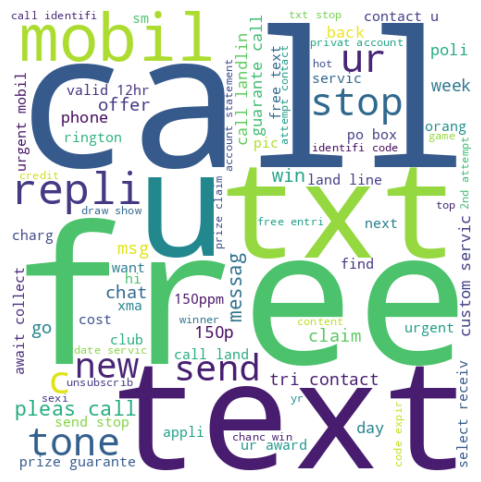

In [34]:
spam_text = " ".join(df[df['target'] == 1]['transformed text'])
spam_wc = wc.generate(spam_text)

plt.figure(figsize = (15, 6))
plt.imshow(spam_wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Word Frequency

In [35]:
from collections import Counter

### Ham word frequency

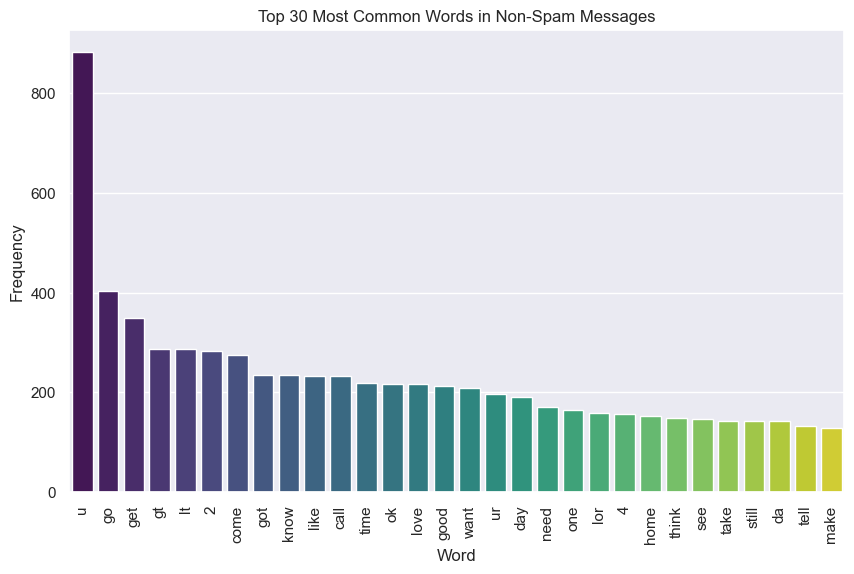

In [36]:
# Extract all words from non-spam (ham) messages
ham_messages = df[df['target'] == 0]['transformed text']
ham_corpus = ' '.join(ham_messages).split()

# Count word frequencies and select the top 30 most common words
word_counts = Counter(ham_corpus)
most_common_words = word_counts.most_common(30)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the top 30 most common words in non-spam messages
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Word', y='Frequency', palette='viridis')
plt.title("Top 30 Most Common Words in Non-Spam Messages")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show()

### Spam word frequency

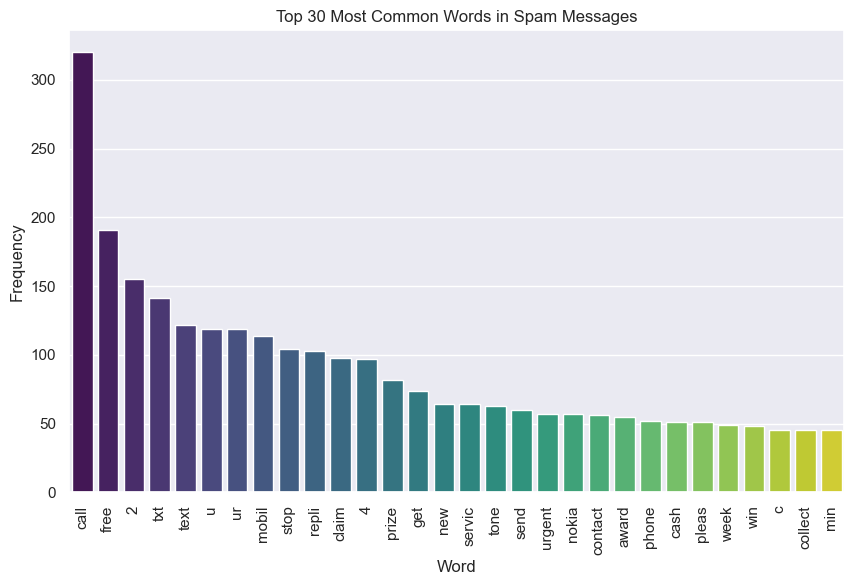

In [37]:
# Extract all words from spam messages
spam_messages = df[df['target'] == 1]['transformed text']
spam_corpus = ' '.join(spam_messages).split()

# Count word frequencies and select the top 30 most common words
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the top 30 most common words in spam messages
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Word', y='Frequency', palette='viridis')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation='vertical')
plt.show()

In [38]:
# Review the dataset
df.head()

,target,text,number of characters,number of words,number of sentences,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Machine Learning

## Transforming words into feature vectors

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [40]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [41]:
X = tfidf.fit_transform(df['transformed text']).toarray()

In [42]:
X.shape

(5169, 3000)

In [43]:
y = df['target'].values

In [44]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Splitting the Dataset

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [46]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,
                                                 random_state=2,
                                                stratify = y)


## Applying Machine Learning Models to the Dataset

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Create a dictionary of classifiers
classifiers = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0),
    'KN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(max_depth=5),
    'LR': LogisticRegression(solver='liblinear', penalty='l1'),
    'RF': RandomForestClassifier(n_estimators=50, random_state=2)
}

def evaluate_classifier(name, clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return name, accuracy, precision

results = []

for name, clf in classifiers.items():
    name, accuracy, precision = evaluate_classifier(name, clf, X_train, y_train, X_test, y_test)
    results.append([name, accuracy, precision])



In [49]:
# Create a DataFrame to display results
performence_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Precision'])
performence_df = performence_df.sort_values('Precision', ascending=False)

performence_df

,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
4,RF,0.982592,0.991304
0,SVC,0.987427,0.975806
3,LR,0.960348,0.932692
2,DT,0.931335,0.772727


<Figure size 1000x600 with 0 Axes>

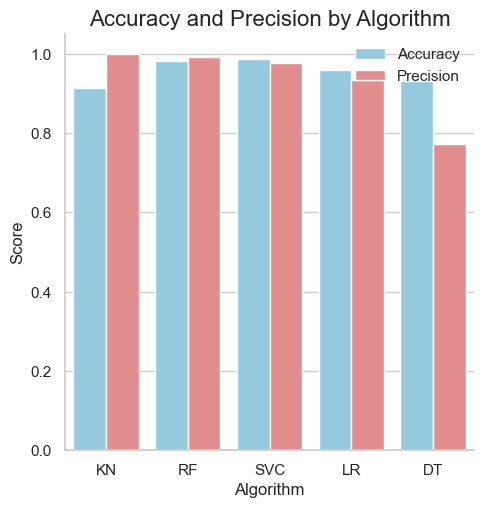

In [50]:
# Reshape the data into a long-form for catplot
performence_df_long = pd.melt(performence_df, id_vars='Algorithm', var_name='Metric', value_name='Score')

# Set a pleasing color palette
custom_palette = {'Accuracy': 'skyblue', 'Precision': 'lightcoral'}

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a catplot
plot = sns.catplot(
    data=performence_df_long,
    x='Algorithm',
    y='Score',
    hue='Metric',
    kind='bar',
    palette=custom_palette,
    legend_out=False  # Display the legend inside the plot
)

plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Accuracy and Precision by Algorithm', fontsize=16)

# Customize the legend
plot.ax.legend(title=None, loc='upper right', frameon=False)

# Set the x-axis tick labels
plt.xticks(ticks=range(len(performence_df['Algorithm'])), labels=performence_df['Algorithm'])

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

## Hyperparameter Tuning and Model Optimization

* In our ongoing pursuit of model refinement and performance optimization, we will be conducting an extensive Grid Search. This rigorous process involves systematically exploring a range of hyperparameter configurations to unlock the full potential of our models and further elevate their capabilities.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Create a dictionary of classifiers with associated hyperparameter grids
classifiers_gr = {
    'SVC': (SVC(), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0]}),
    'KN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'DT': (DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
    'LR': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'RF': (RandomForestClassifier(), {'n_estimators': [50, 100, 150]})
}

In [53]:
def evaluate_classifier_gr(name, clf, params, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(clf, params, cv = 3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    clf_best = grid_search.best_estimator_
    y_pred = clf_best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_params = grid_search.best_params_
    return name, accuracy, best_params



In [54]:
results_tun = []

for name, (clf, params) in classifiers_gr.items():
    name, accuracy, best_params = evaluate_classifier_gr(name, clf, params, X_train, y_train, X_test, y_test)
    results_tun.append([name, accuracy, best_params])


In [55]:
# Create a DataFrame to display results
performence_df_tune = pd.DataFrame(results_tun, columns=['Algorithm', 'Accuracy', 'Best Parameters'])
performence_df_tune = performence_df_tune.sort_values('Accuracy', ascending=False)
performence_df_tune

,Algorithm,Accuracy,Best Parameters
0,SVC,0.987427,"{'C': 1.0, 'kernel': 'linear'}"
3,LR,0.987427,{'C': 10.0}
4,RF,0.985493,{'n_estimators': 100}
2,DT,0.951644,{'max_depth': 15}
1,KN,0.924565,{'n_neighbors': 3}


<Figure size 1000x600 with 0 Axes>

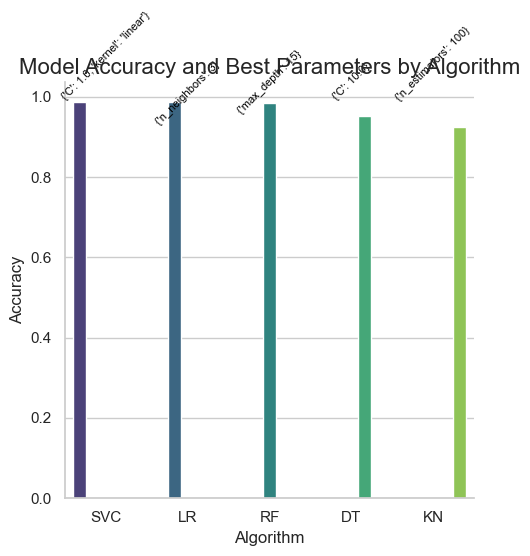

In [56]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a catplot
plot = sns.catplot(
    data=performence_df_tune,
    x='Algorithm',
    y='Accuracy',
    hue='Algorithm',
    kind='bar',
    palette='viridis'
)

# Add text labels for the best parameters
for i, row in performence_df_tune.iterrows():
    plt.text(i, row['Accuracy'], str(row['Best Parameters']), rotation=45, fontsize=8, va='bottom', ha='center', color='black')

plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy and Best Parameters by Algorithm', fontsize=16)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

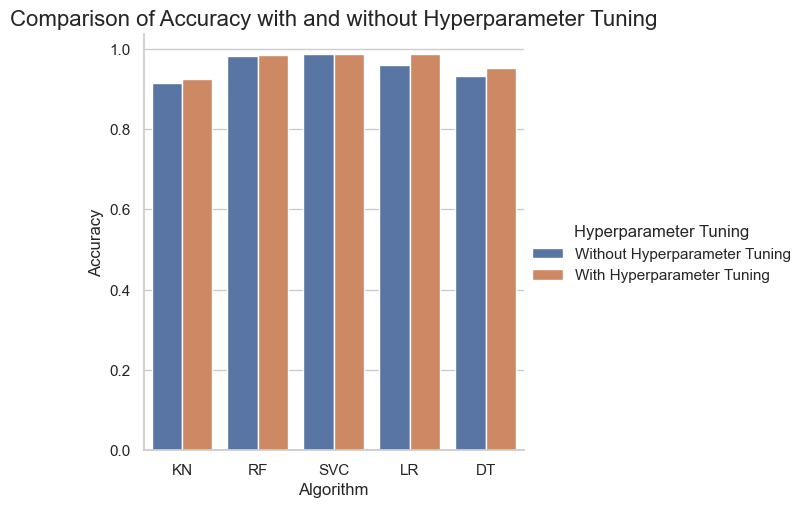

In [57]:
# Combine both DataFrames with a new column 'Data' to distinguish them
performence_df['Data'] = 'Without Hyperparameter Tuning'
performence_df_tune['Data'] = 'With Hyperparameter Tuning'

combined_df = pd.concat([performence_df, performence_df_tune])

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a catplot
sns.set(style='whitegrid')
g = sns.catplot(
    data=combined_df,
    x='Algorithm',
    y='Accuracy',
    hue='Data',
    kind='bar',
)

plt.title('Comparison of Accuracy with and without Hyperparameter Tuning', fontsize=16)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Customize legend
g._legend.set_title('Hyperparameter Tuning')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In [58]:
# Create an SVC classifier with C = 1.0 and linear kernel
clf = SVC(C=1.0, kernel='linear')

# Fit the classifier on the training data
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [59]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9874274661508704


In [60]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [62]:
from ipywidgets import interact, widgets

# Function to classify SMS
def classify_sms(input_sms):
    # Preprocessing and vectorization steps
    transformed_sms = transform_text(input_sms)
    vector_input = tfidf.transform([transformed_sms])
    
    # Convert the sparse input to dense
    dense_vector_input = vector_input.toarray()

    # Make the prediction
    result = clf.predict(dense_vector_input)[0]

    # Translate the result
    if result == 0:
        return "HAM"
    else:
        return "SPAM"

# Input widget
input_text = widgets.Text(
    value='',
    description='Enter SMS:',
)

# Button widget
predict_button = widgets.Button(
    description="Predict",
)

# Output widget
output_text = widgets.HTML(value="")

# Function to handle button click
def on_button_click(b):
    sms = input_text.value
    result = classify_sms(sms)
    output_text.value = "<b>Result:</b> " + result

predict_button.on_click(on_button_click)

# Display the widgets
display(input_text, predict_button, output_text)


Text(value='', description='Enter SMS:')

Button(description='Predict', style=ButtonStyle())

HTML(value='')

**Try the following messages to test the SMS classification model:**

* You've been selected as the winner of our weekly lottery! Claim your 1,000,000 prize now!

* Your appointment with the dentist is tomorrow at 2 PM.

* Hey, it's John. Do you have the notes from yesterday's class?